In [6]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
    
# bимпортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

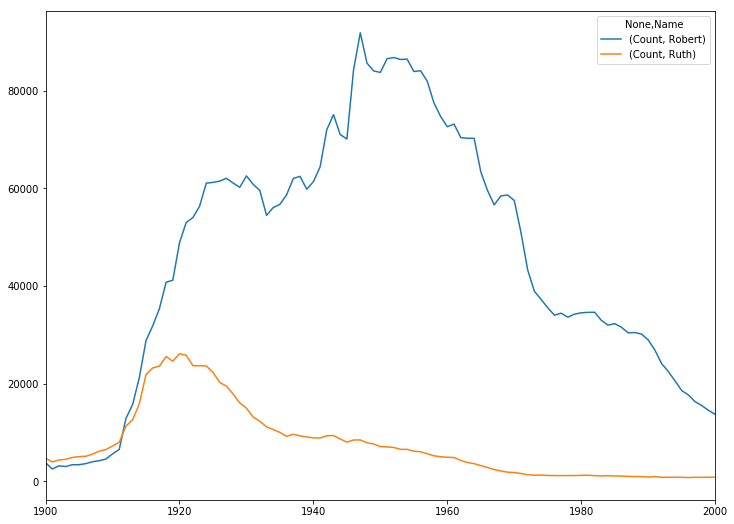

In [7]:
# Задание 1

path = 'names' # путь к файлу
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(
        f'{path}/yob{year}.txt',
        names=['Name', 'Gender', 'Count']
    )
names_count = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_count = names_count.loc[(names_count['Name'].isin(['Ruth', 'Robert']))]
names_count = names_count.groupby([names_count.index, 'Name']).sum()
names_count.unstack('Name').plot()


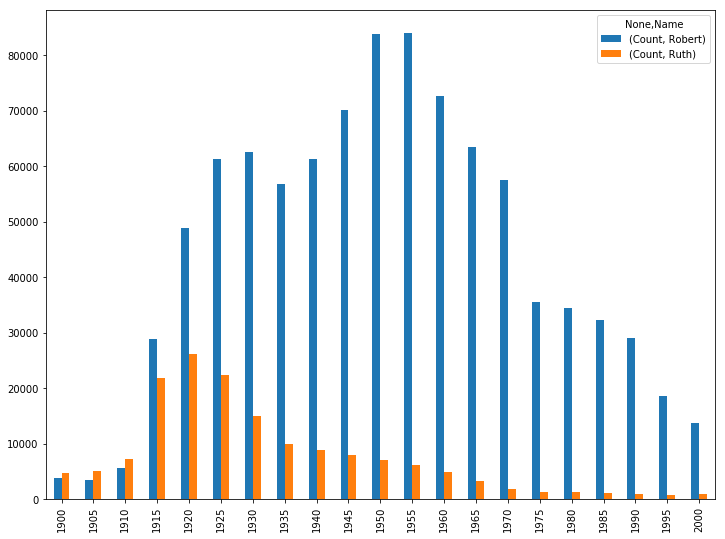

In [8]:
# Задание 2

year_range = list(range(1900, 2001, 5))
names_count2 = names_count.loc[(names_count.index.get_level_values(0).isin(year_range))]
names_count2.unstack('Name').plot(kind='bar')


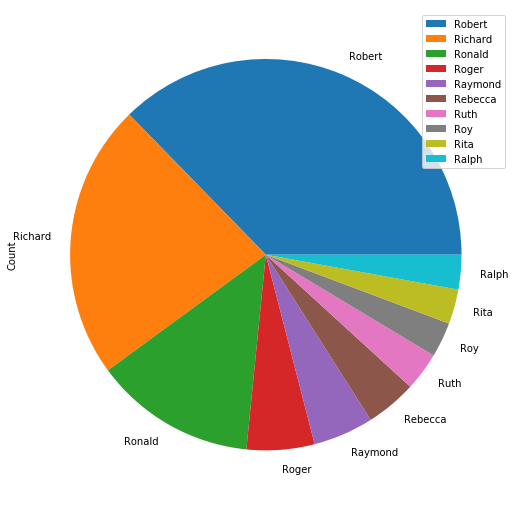

In [9]:
# Задание 3

all_r_names = pd.read_csv(
    f'{path}/yob1950.txt',
    names=['Name', 'Gender', 'Count'])
# top_r = all_r_names.reset_index(drop=True)
all_r_names = all_r_names.set_index(['Name'])
top_r = all_r_names[all_r_names.index.str[0] == 'R'].sort_values('Count', ascending=False).head(10)
top_r.plot(kind='pie', y='Count')

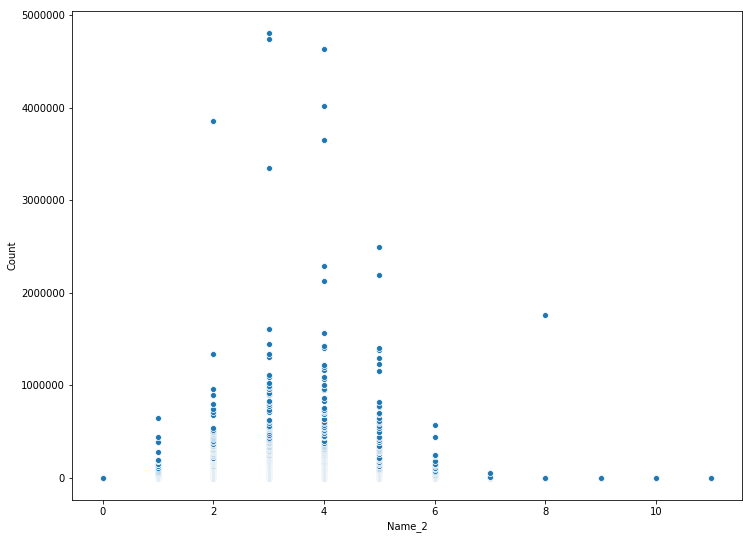

In [21]:
# Построить точечную диаграмму по количеству согласных букв в 
# именах и частоте употребления за 100 лет. Т.е. необходимо 
# сложить всю статистику с 1900 до 2000, сгруппировать по именам, 
# посчитать количество согласных букв в каждом имени и вывести на 
# график отношение "Количество согласных букв в имени" : "Количество 
# употреблений".
def count_l(x):
    l_count = 0
    for l in x:
        if l.lower() not in 'aeiouy':
            l_count += 1
    return l_count

for year in range(1900, 1901):
    names_by_year[year] = pd.read_csv(
        f'{path}/yob{year}.txt',
        names=['Name', 'Gender', 'Count']
    )
names_100 = pd.concat(names_by_year).groupby(['Name']).sum().reset_index()
names_100['Name_2'] = names_100['Name'].map(count_l)
names_100 = names_100.sort_values(by='Count', ascending=True)
names_100

sns.scatterplot(x='Name_2', y='Count',data=names_100)
